<a href="https://colab.research.google.com/github/Lauram04/proyecto_final_f/blob/main/Actividad_Final_Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de Costos Variables y su Relación con el Volumen de Producción en una Empresa de Manufactura**

**Equipo F**



##### Jesús Javier Gálvez Cruz
##### Laura Alicia Medrano Gaytán
##### Erika Paloma Sánchez Fema






**Resumen**



En este proyecto nos enfocaremos en el análisis de los costos variables de una empresa de la industria maquiladora. 

Los costos variables de una empresa son aquellos que están asociados con la cantidad de bienes o servicios que produce, los costos variables de una empresa aumentan y disminuyen con su volumen de producción.

Uno de los principales problemas a los que se enfrenta el área financiera y operativa es que no se cuenta con un modelo que ayude a identificar la relación entre los costos variables de la empresa y su volumen de producción, por lo que trabajaremos en aquellos costos relacionados a consumo de materiales, químicos y mantenimiento. Con la ayuda de modelos matemáticos, tales como métodos lineales, discutiremos
la relación entre éstos y determinaremos si este método es eficiente para predicción de costos, teniendo como
datos de entrada costos y volumen de producción.

**Objetivo General**
- Crear un modelo que indique la relación entre costos y producción.
- Predecir el consumo de costos a futuro de acuerdo a los volúmenes de producción planeados.

**Objetivos específicos**

- Medir y modelar los datos recolectados utilizando herramientas para el lenguaje Python.
- Determinar si existe relación entre los costos variables y la producción utilizando modelos matemáticos.
- Identificar patrones de comportamiento de los gastos variables de acuerdo al volumen de producción.
- Determinar si es adecuado utilizar un modelo de regresión lineal.
- Realizar predicciones de costos futuros.

**Datos**

| Variable || Unidad de Medida || Tipo |
| --- || --- || --- |
| Product || N/A | Categórica |
| Mes || N/A | Cuantitativa |
| Volumen Producción || Unidades | Cuantitativa |
| Volumen Producción \$ || USD | Cuantitativa |
| Mantenimiento \$  || USD | Cuantitativa |
| Material \$  || USD | Cuantitativa |
| Químicos \$  || USD | Cuantitativa |


**Desarrollo**

Importamos las librerías a utilizar

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import pprint
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse, r2_score
from numpy.linalg import inv


**Volumen de producción y Costos variables por mes 2020 - 2021**

Lectura del set de datos a utilizar, tomaremos los últimos 12 meses 

In [ ]:
costos = pd.read_excel('data_set_n.xlsx', sheet_name = 'data_historica' )
costos = costos.loc[:11]
costos

,Producto,Mes,Volumen Produccion,Volumen Produccion $,Seguridad $,Quimicos $,Material $
0,A,2020-07-01,2904,459988.586244,177.289200,342.231508,876.479472
1,A,2020-08-01,2705,297350.970840,90.151776,221.229122,294.818436
2,A,2020-09-01,3535,516788.365104,158.750064,384.634800,810.703872
3,A,2020-10-01,3192,401008.703436,122.355684,298.350475,350.178840
4,A,2020-11-01,3213,521199.015480,181.218312,768.834000,806.034240
5,A,2020-12-01,2892,398773.879416,130.558032,576.734400,1304.826732
6,A,2021-01-01,3454,438016.765428,121.562892,384.634800,133.794540
7,A,2021-02-01,3808,412804.982304,128.506356,307.126907,212.189472
8,A,2021-03-01,3489,369779.663880,77.763312,372.873600,103.938516
9,A,2021-04-01,2228,307747.976184,45.968868,228.964494,29.660004


In [ ]:
costos.describe()

,Volumen Produccion,Volumen Produccion $,Seguridad $,Quimicos $,Material $
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,3097.454545,403400.435328,120.652092,374.471804,459.089532
std,467.662349,77960.094722,41.952701,165.081027,419.487546
min,2228.000000,297350.970840,45.968868,221.229122,29.660004
25%,2798.500000,341862.772086,91.600146,265.963105,130.577634
50%,3192.000000,401008.703436,122.355684,342.231508,294.818436
75%,3471.500000,449002.675836,144.654048,384.634800,808.369056
max,3808.000000,521199.015480,181.218312,768.834000,1304.826732


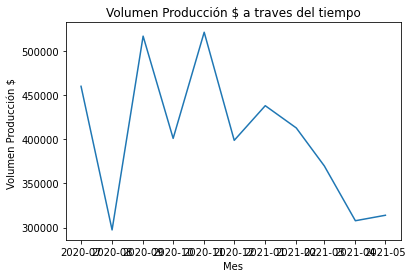

In [ ]:

plt.title('Volumen Producción \$ a través del tiempo')
plt.ylabel('Volumen Producción \$ ')
plt.xlabel('Mes')
plt.plot(costos['Mes'],costos['Volumen Produccion $'] )

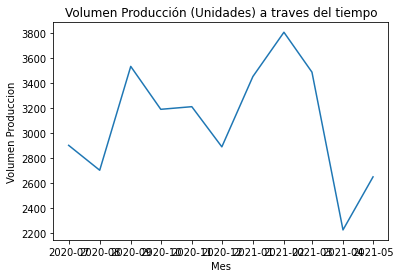

In [ ]:
plt.title('Volumen Producción (Unidades) a través del tiempo')
plt.ylabel('Volumen Producción')
plt.xlabel('Mes')
plt.plot(costos['Mes'],costos['Volumen Produccion'] )

**Ordenamos el set datos por volumen de producción**

Debido a que se desea obtener la relación entre el volumen de producción y los costos variables, ordenamos el set de datos por volumen de producción para obtener las diferencias

In [ ]:

costos = costos.sort_values(by='Volumen Produccion $')
costos

,Producto,Mes,Volumen Produccion,Volumen Produccion $,Seguridad $,Quimicos $,Material $
1,A,2020-08-01,2705,297350.970840,90.151776,221.229122,294.818436
9,A,2021-04-01,2228,307747.976184,45.968868,228.964494,29.660004
10,A,2021-05-01,2652,313945.880292,93.048516,233.575735,127.360728
8,A,2021-03-01,3489,369779.663880,77.763312,372.873600,103.938516
5,A,2020-12-01,2892,398773.879416,130.558032,576.734400,1304.826732
3,A,2020-10-01,3192,401008.703436,122.355684,298.350475,350.178840
7,A,2021-02-01,3808,412804.982304,128.506356,307.126907,212.189472
6,A,2021-01-01,3454,438016.765428,121.562892,384.634800,133.794540
0,A,2020-07-01,2904,459988.586244,177.289200,342.231508,876.479472
2,A,2020-09-01,3535,516788.365104,158.750064,384.634800,810.703872


**Relación de Volumen de Producción vs Seguridad**

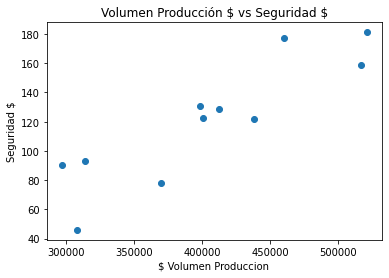

In [ ]:
plt.title('Volumen Producción \$ vs Seguridad \$')
plt.ylabel('Seguridad $')
plt.xlabel('$ Volumen Producción ')
plt.scatter(costos['Volumen Produccion $'], costos['Seguridad $'] )

**Calculando primeras y segundas diferencias para el costo de seguridad**

Primeras diferencias

Resultado: 
 [-44.182908  47.079648 -15.285204  52.79472   -8.202348   6.150672
  -6.943464  55.726308 -18.539136  22.468248]


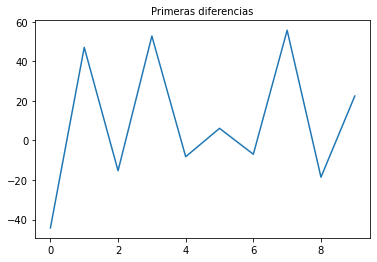

In [ ]:
dif_seg_1 = np.diff(costos['Seguridad $'])
plt.title('Primeras diferencias',fontsize=10,loc='center')
plt.plot(dif_seg_1)
print("Resultado: \n", dif_seg_1)


Segundas diferencias

Resultado de segundas diferencias: 

 [ 91.262556 -62.364852  68.079924 -60.997068  14.35302  -13.094136
  62.669772 -74.265444  41.007384]


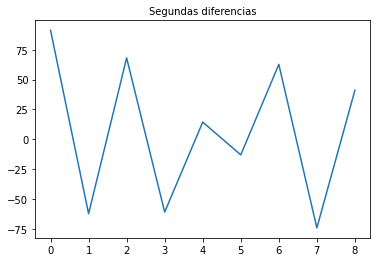

In [ ]:
dif_seg_2 = np.diff(costos['Seguridad $'],2)
plt.title('Segundas diferencias',fontsize=10,loc='center')
plt.plot(dif_seg_2)
print("Resultado de segundas diferencias: \n\n", dif_seg_2)

Ordenando usando  volumen en unidades

In [ ]:
costos = costos.sort_values(by='Volumen Produccion')
costos

,Producto,Mes,Volumen Produccion,Volumen Produccion $,Seguridad $,Quimicos $,Material $
9,A,2021-04-01,2228,307747.976184,45.968868,228.964494,29.660004
10,A,2021-05-01,2652,313945.880292,93.048516,233.575735,127.360728
1,A,2020-08-01,2705,297350.970840,90.151776,221.229122,294.818436
5,A,2020-12-01,2892,398773.879416,130.558032,576.734400,1304.826732
0,A,2020-07-01,2904,459988.586244,177.289200,342.231508,876.479472
3,A,2020-10-01,3192,401008.703436,122.355684,298.350475,350.178840
4,A,2020-11-01,3213,521199.015480,181.218312,768.834000,806.034240
6,A,2021-01-01,3454,438016.765428,121.562892,384.634800,133.794540
8,A,2021-03-01,3489,369779.663880,77.763312,372.873600,103.938516
2,A,2020-09-01,3535,516788.365104,158.750064,384.634800,810.703872


Resultado: 
 [ 47.079648  -2.89674   40.406256  46.731168 -54.933516  58.862628
 -59.65542  -43.79958   80.986752 -30.243708]


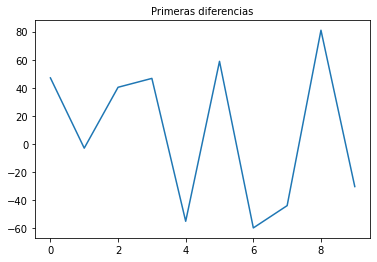

In [ ]:
dif_seg_1 = np.diff(costos['Seguridad $'])
plt.title('Primeras diferencias',fontsize=10,loc='center')
plt.plot(dif_seg_1)
print("Resultado: \n", dif_seg_1)

**Costos**

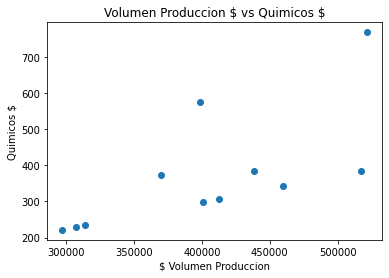

In [ ]:
plt.title('Volumen Producción \$ vs Químicos \$')
plt.ylabel('Químicos $')
plt.xlabel('$ Volumen Producción')
plt.scatter(costos['Volumen Produccion $'], costos['Quimicos $'] )

**Calculando primeras y segundas diferencias para Químicos**

Las primeras diferencias son:  [   4.61124066  -12.34661263  355.5052777  -234.50289183  -43.88103281
  470.48352464 -384.1992      -11.7612       11.7612      -77.50789317]


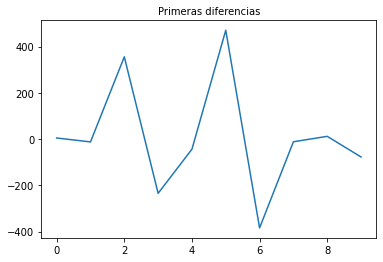

In [ ]:
dif_seg_1 = np.diff(costos['Quimicos $'])
plt.title('Primeras diferencias',fontsize=10,loc='center')
plt.plot(dif_seg_1)
print("Las primeras diferencias son: ", dif_seg_1)

Las primeras diferencias son:  [   4.61124066  -12.34661263  355.5052777  -234.50289183  -43.88103281
  470.48352464 -384.1992      -11.7612       11.7612      -77.50789317]


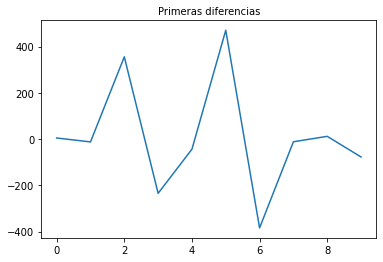

In [ ]:
dif_seg_2 = np.diff(costos['Quimicos $'])
plt.title('Primeras diferencias',fontsize=10,loc='center')
plt.plot(dif_seg_1)
print("Las primeras diferencias son: ", dif_seg_2)


Las primeras diferencias son:  [  97.700724  167.457708 1010.008296 -428.34726  -526.300632  455.8554
 -672.2397    -29.856024  706.765356 -598.5144  ]


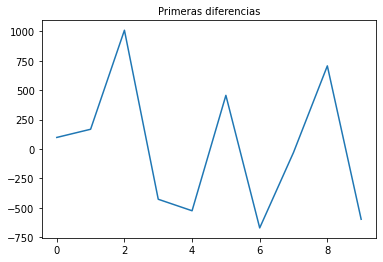

In [ ]:
dif_seg_1 = np.diff(costos['Material $'])
plt.title('Primeras diferencias',fontsize=10,loc='center')
plt.plot(dif_seg_1)
print("Las primeras diferencias son: ", dif_seg_1)

Resultado de segundas diferencias son:
  [   69.756984   842.550588 -1438.355556   -97.953372   982.156032
 -1128.0951     642.383676   736.62138  -1305.279756] 



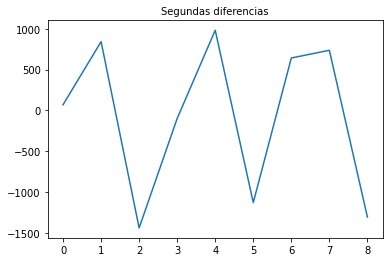

In [ ]:
dif_seg_2 = np.diff(costos['Material $'], 2)
plt.title('Segundas diferencias',fontsize=10,loc='center')
plt.plot(dif_seg_2)
print("Resultado de segundas diferencias son:\n ", dif_seg_2,'\n')


**Modelado de datos a traves de regresión lineal**


Utilizaremos el modelo de regresión lineal simple, en donde nuestras variables dependientes seran los costos variables, tomaremos como variable independiente el volumen de producción monetizado.

**Seguridad**

Creando el modelo de regresión

In [ ]:
y = np.asarray(costos['Seguridad $'])
X = np.asarray(costos['Volumen Produccion $']).reshape(-1, 1)
regresion_lineal_s = LinearRegression() 
regresion_lineal_s.fit(X, y)
y_pred = regresion_lineal_s.predict(X)

Métricas

In [ ]:
print (f'Coeficiente beta1: ', regresion_lineal_s.coef_[0])
print('w = ' + str(regresion_lineal_s.coef_) + ', b = ' + str(regresion_lineal_s.intercept_))
print("Error cuadrático medio: %.2f" % math.sqrt(mse(y, y_pred)))
print('r cuadrada: %.2f' % r2_score(y, y_pred))

b0L = regresion_lineal_s.intercept_
b1L = regresion_lineal_s.coef_[0]


Coeficiente beta1:  0.00047721958600368614
w = [0.00047722], b = -71.85849674093491
Error cuadratico medio: 18.49
r cuadrada: 0.79


Gráfica de Regresión

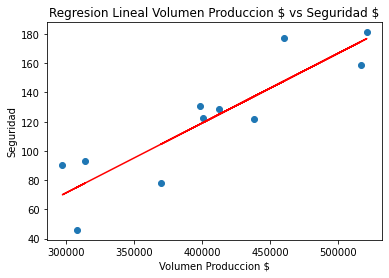

In [ ]:
plt.title('Regresión Lineal Volumen Producción \$ vs Seguridad \$')
plt.ylabel('Seguridad')
plt.xlabel('Volumen Producción $')
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()


**Observaciones** 

El costo de seguridad en algunos puntos sí está asociado con el volumen de producción. Existen casos en los cuales no se ve la asociación, por ejemplo: 
volumen de producción = $$307,747.976184	y costo de seguridad = $45.96886



**Químicos**

Generando modelo de regresión

In [ ]:
y_q = np.asarray(costos['Quimicos $'])
regresion_lineal_q = LinearRegression()
regresion_lineal_q.fit(X, y_q)
y_pred_q = regresion_lineal_q.predict(X)

Métricas

In [ ]:
b0L = regresion_lineal_s.intercept_
b1L = regresion_lineal_s.coef_[0]
print (f'Coeficiente beta1: ', regresion_lineal_q.coef_[0])
print('w = ' + str(regresion_lineal_q.coef_) + ', b = ' + str(regresion_lineal_q.intercept_))
print("Error cuadrático medio: %.2f" % math.sqrt(mse(y, y_pred_q)))
print('r cuadrada: %.2f' % r2_score(y, y_pred_q))



Coeficiente beta1:  0.0014409045036531236
w = [0.0014409], b = -206.78970023254578
Error cuadratico medio: 264.38
r cuadrada: -42.69


Gráfica de Regresión

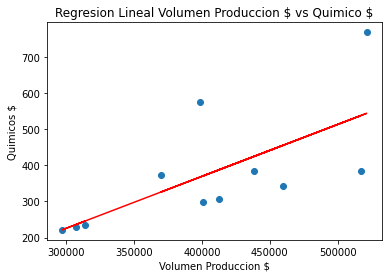

In [ ]:
plt.title('Regresión Lineal Volumen Producción \$ vs Químicos \$')
plt.ylabel('Químicos $')
plt.xlabel('Volumen Producción $')
plt.scatter(X, y_q)
plt.plot(X, y_pred_q, color='red')
plt.show()


**Observaciones**

El resultado negativo de la r cuadrada, nos indica que no existe una relación entre el volumen de producción y el costo de químicos, en la gráfica podemos observar como solo un punto está cercano a la línea de regresión, por lo tanto podemos determinar que el modelo lineal para este grupo de datos no es eficiente.


**Material**

Creando modelo de regresión

In [ ]:
y_m = np.asarray(costos['Material $'])
regresion_lineal_m = LinearRegression()
regresion_lineal_m.fit(X, y_m)
y_pred_m = regresion_lineal_q.predict(X)

Métricas

In [ ]:
print (f'Coeficiente beta1: ', regresion_lineal_m.coef_[0])
print('w = ' + str(regresion_lineal_m.coef_) + ', b = ' + str(regresion_lineal_m.intercept_))
print("Error cuadrático medio: %.2f" % math.sqrt(mse(y, y_pred_m)))
print('r cuadrada: %.2f' % r2_score(y, y_pred_m))


Coeficiente beta1:  0.00308064690380222
w = [0.00308065], b = -783.6447700856709
Error cuadratico medio: 264.38
r cuadrada: -42.69


Gráfica de Regresión

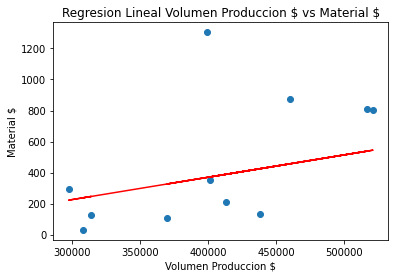

In [ ]:
plt.title('Regresión Lineal Volumen Producción \$ vs Material \$')
plt.ylabel('Material $')
plt.xlabel('Volumen Producción $')
plt.scatter(X, y_m)
plt.plot(X, y_pred_m, color='red')
plt.show()

**Observaciones**

De acuerdo al resultado obtenido en el valor de r cuadrada, el modelo no es completamente lineal. Algunos de los puntos no se encuentran cercanos a  la línea de regresión y se pueden observar outliers en algunos de los costos de material. Por lo tanto, el modelo lineal no es eficiente para este grupo de datos.

**Predicción**

Con los resultados obtenidos en las regresiones anteriores, realizaremos la predicción para cada costo variable para los próximos 6 meses, como dato de entrada utilizaremos el volumen monetizado.

In [ ]:
planeado = pd.read_excel('data_set_n.xlsx', sheet_name = 'data_planeada' )
X_planeada = np.asarray(planeado['Volumen Produccion $']).reshape(-1, 1)
planeado.head()

,Mes,Volumen Produccion,Volumen Produccion $
0,2021-06-01,1608,428109.8184
1,2021-07-01,1310,348792.9291
2,2021-08-01,1347,358710.0363
3,2021-09-01,1287,342487.4904
4,2021-10-01,1855,493681.9932


**Prediciendo los costos futuros de seguridad**

Desplegando los datos

In [ ]:

planeado['Seguridad $ - F'] = regresion_lineal_s.predict(X_planeada)
planeado

,Mes,Volumen Produccion,Volumen Produccion $,Seguridad $ - F
0,2021-06-01,1608,428109.8184,132.443894
1,2021-07-01,1310,348792.9291,94.592320
2,2021-08-01,1347,358710.0363,99.324958
3,2021-09-01,1287,342487.4904,91.583242
4,2021-10-01,1855,493681.9932,163.736220
5,2021-11-01,1322,351891.6984,96.071114
6,2021-12-01,1150,351892.3419,96.071421


**Prediciendo los costos futuros de Químicos**

In [ ]:

planeado['Quimicos $ - F'] = regresion_lineal_q.predict(X_planeada)
planeado

,Mes,Volumen Produccion,Volumen Produccion $,Seguridad $ - F,Quimicos $ - F
0,2021-06-01,1608,428109.8184,132.443894,410.075665
1,2021-07-01,1310,348792.9291,94.592320,295.787602
2,2021-08-01,1347,358710.0363,99.324958,310.077207
3,2021-09-01,1287,342487.4904,91.583242,286.702067
4,2021-10-01,1855,493681.9932,163.736220,504.558907
5,2021-11-01,1322,351891.6984,96.071114,300.252633
6,2021-12-01,1150,351892.3419,96.071421,300.253560


**Prediciendo los costos futuros de Químicos**

In [ ]:
planeado['Quimicos $ - F'] = regresion_lineal_q.predict(X_planeada)
planeado

,Mes,Volumen Produccion,Volumen Produccion $,Seguridad $ - F,Quimicos $ - F
0,2021-06-01,1608,428109.8184,132.443894,410.075665
1,2021-07-01,1310,348792.9291,94.592320,295.787602
2,2021-08-01,1347,358710.0363,99.324958,310.077207
3,2021-09-01,1287,342487.4904,91.583242,286.702067
4,2021-10-01,1855,493681.9932,163.736220,504.558907
5,2021-11-01,1322,351891.6984,96.071114,300.252633
6,2021-12-01,1150,351892.3419,96.071421,300.253560
